In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [3]:
BENCHMARKING_PARENT_DIR = Path('benchmarks')

In [4]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [5]:
metrics = pd.DataFrame(metric_dicts)
metrics = metrics.sort_values(by='model_name', ignore_index=True)

In [6]:
metrics

,model_name,alignment,uniformity,alignment + uniformity,5nn_accuracy
0,CDR3BERT_c_6_128_8_512-embed_5,0.636562,-0.686706,-0.050144,0.483696
1,CDR3BERT_cp_6_128_8_512-embed_5,0.622111,-0.575493,0.046619,0.478261
2,SupSimCTE_CDR3BERT_cp_6_128_8_512,0.434982,-0.402963,0.032019,0.576087
3,UnsupSimCTE_CDR3BERT_cp_6_128_8_512,1.261862,-1.335646,-0.073784,0.500000
4,atchley_embedder,0.955340,-0.989884,-0.034544,0.385870
5,random_embedder_0,0.120872,-0.198878,-0.078006,0.461957
6,random_embedder_1,0.167687,-0.356251,-0.188564,0.434783
7,random_embedder_2,0.258564,-0.443316,-0.184753,0.456522
8,random_embedder_3,0.113566,-0.243810,-0.130244,0.418478
9,random_embedder_4,0.194913,-0.323840,-0.128927,0.494565


In [7]:

def collapse_names(name):
    groups = (
        'random_embedder',
        'UnsupSimCTE_CDR3BERT_cp',
        'SupSimCTE_CDR3BERT_cp',
        'CDR3BERT_cp',
        'CDR3BERT_c'
    )

    for group in groups:
        if group in name:
            return group
    
    return name

metrics['model_name'] = metrics['model_name'].map(collapse_names)

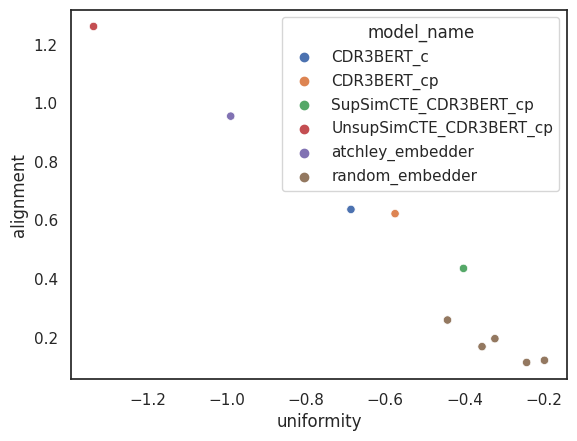

In [8]:
scatter_model_names = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='model_name')
plt.show()

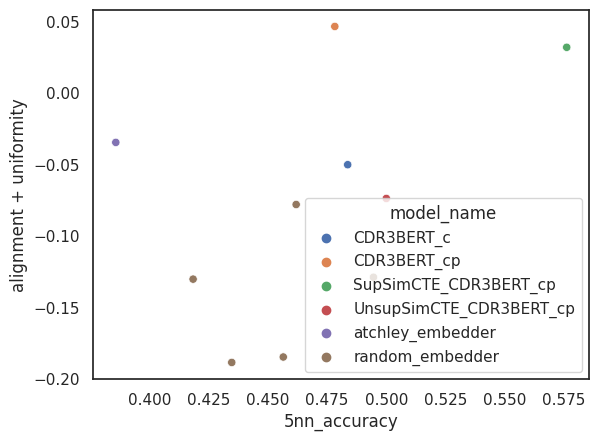

In [13]:
scatter_model_names = seaborn.scatterplot(metrics, x='5nn_accuracy', y='alignment + uniformity', hue='model_name')
plt.show()

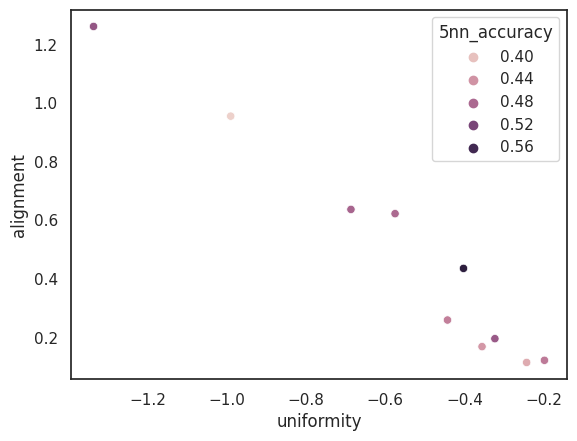

In [9]:
scatter_5nn_accs = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='5nn_accuracy')
plt.show()